
# Project: Investigate a Dataset - noshowappointments


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.The goal is to find factors to predict why patients either miss or showup for their appointment. 


In [34]:
#import librarys to analyse the dataframe
import numpy as np
import pandas as pd
import time

# for chart visualization
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline


## Questions

* What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

* which day of the week is more turnup of patients recorded?

## Data Wrangling

In [35]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('noshowappointments.csv')
#   types and look for instances of missing or possibly errant data.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [36]:
#check for the info of the columns. ie check for nan values,number of columns etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


As seen above, the output of the 'df.info()' code shows that there are no nan values, the total number of rows are 110527, total number of columns is 14, it also gives us a view of the various datatype of each column. e.g  PatientId column is a float. Overall, we can say this dataframe is pretty clean. We just have a few more checks to carry out.

In [37]:
#check for duplicate columns
df.duplicated().sum()

0

From the check for duplicate columns, we can say that this dataframe is very clean. the check came out false. meaning there are no duplicate columns in the dataframe. now we can continue to carry out more work.

In [38]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [39]:
# for easy future reference, rename the independent column name
df.rename(columns={'No-show': 'noshow'}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


convert scheduledday and appointmentday to datetime

In [40]:
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)

In [41]:
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [42]:
Absent = df['noshow'] == 'Yes'
show = df['noshow'] == 'No'

## Exploratory Data Analysis

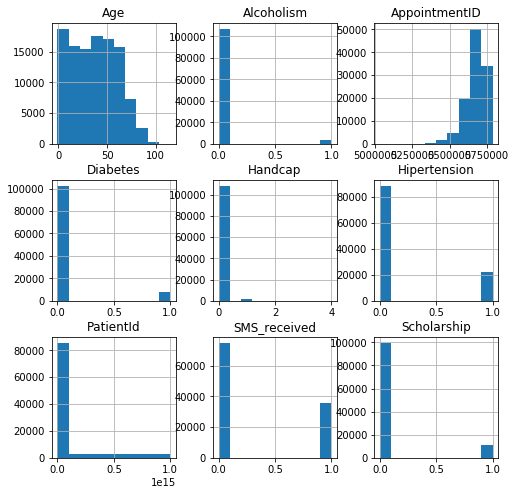

In [43]:
#visualization of all the columns im the dataframe
df.hist(figsize=(8,8));

#### Gender

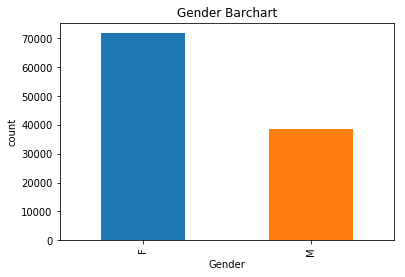

In [44]:
df.Gender.value_counts().plot(kind='bar');
plt.xlabel('Gender');
plt.ylabel('count');
plt.title('Gender Barchart');

The Bar chart plotted from the value count of the Dichotomous gender column shows that the number of females in the data set are more than the males.The females are above the 70000 mark while the males are almost at the 40000 mark


#### Hipertension

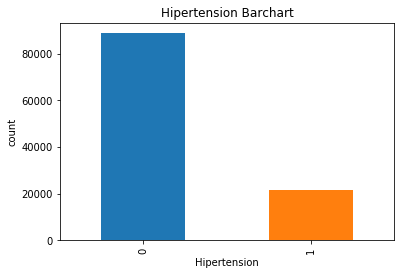

In [45]:
df.Hipertension.value_counts().plot(kind='bar');
plt.xlabel('Hipertension');
plt.ylabel('count');
plt.title('Hipertension Barchart');

From the chart, the patients who are hypertensive are incredibly lower than those who are not

#### Diabetes

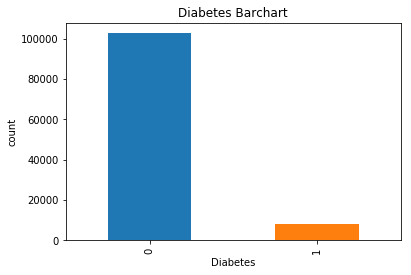

In [46]:
df.Diabetes.value_counts().plot(kind='bar');
plt.xlabel('Diabetes');
plt.ylabel('count');
plt.title('Diabetes Barchart');

As seen above, patients who do not have diabetes are incredibly higher than the patients who have it.

#### Age

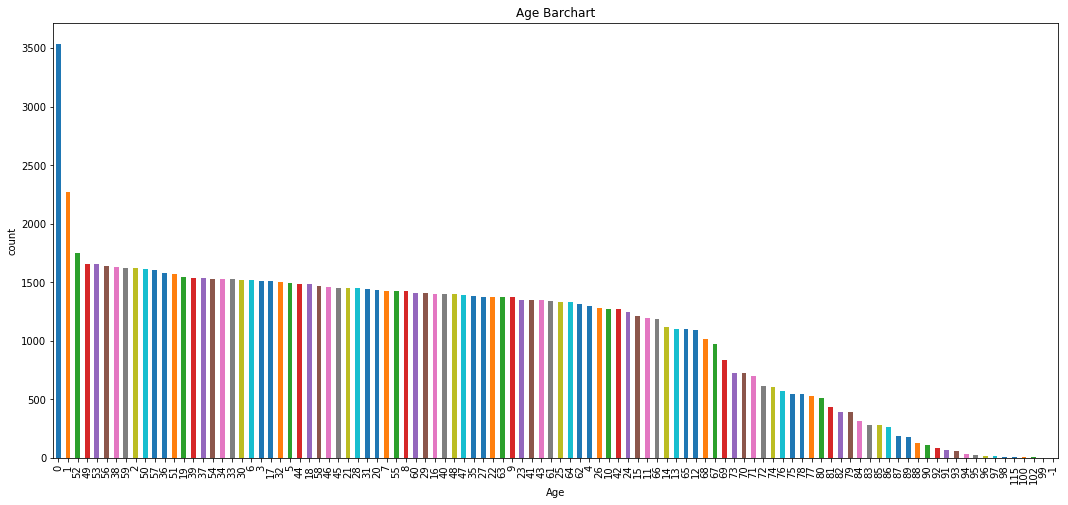

In [47]:
df.Age.value_counts().plot(kind='bar', figsize=(18,8));
plt.xlabel('Age');
plt.ylabel('count');
plt.title('Age Barchart');

The chart above is a bar chart that shows a visualizaion of the value counts of the various ages in the age column. above, the age with the highest value is 0 followed by 1 and then 52 and 49. -1 and 99 are the ages with the lowest values

#### noshow

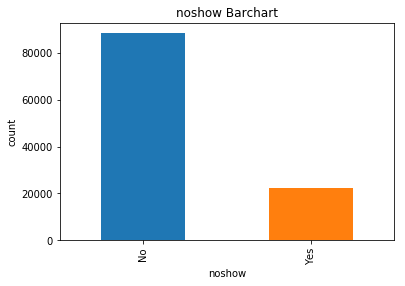

In [48]:
df.noshow.value_counts().plot(kind='bar');
plt.xlabel('noshow');
plt.ylabel('count');
plt.title('noshow Barchart');

The patients that showed up are more than those that were absent as seen above

####  Handcap

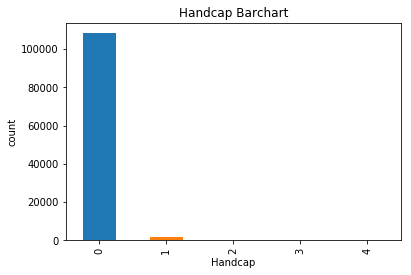

In [49]:
df.Handcap.value_counts().plot(kind='bar');
plt.xlabel('Handcap');
plt.ylabel('count');
plt.title('Handcap Barchart');

from the chart, it shows that majority of the patients have 0 handicaps. basically more than half. just a few people have 1-4 handicaps

#### SMS_received

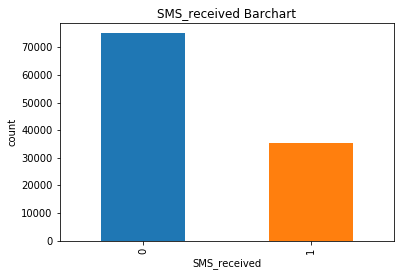

In [50]:
df.SMS_received.value_counts().plot(kind='bar');
plt.xlabel('SMS_received');
plt.ylabel('count');
plt.title('SMS_received Barchart');

This shows that a lot of people did not receive sms reminder.

#### Scholarship

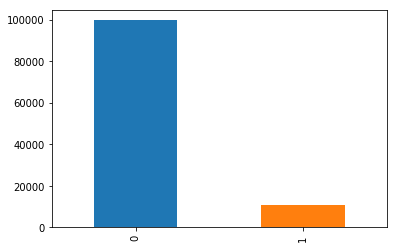

In [51]:
df.Scholarship.value_counts().plot(kind='bar');

Scholarship according to the dataset options indicates whether or not the patient is enrolled in Brasilian welfare program, and from the bar chart above, it looks like only a few of the patients were enrolled in the program.

We can also visualize the above in a pie chart. here are a few.

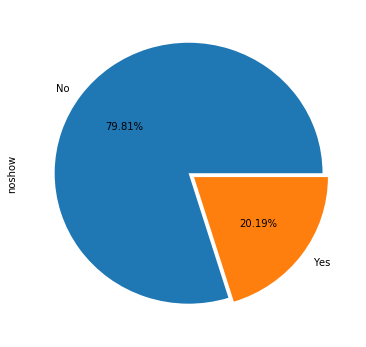

In [52]:
df.noshow.value_counts().plot.pie(figsize=(6,6),autopct='%.2f%%',explode=(0, .05));

As seen above in the pie chart, the percentage of patients that showed up for their appointment is higher than that of those that didnt show up for whichever reason be it hypertension, age, diabetes, etc. the piechart was derived from the value count of the noshow column.

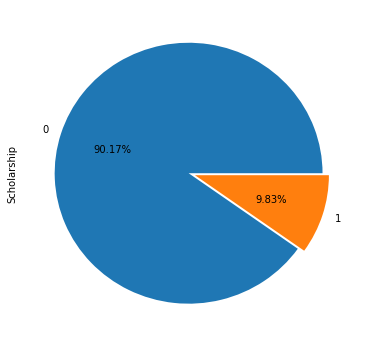

In [53]:
df.Scholarship.value_counts().plot.pie(figsize=(6,6),autopct='%.2f%%',explode=(0, .05));

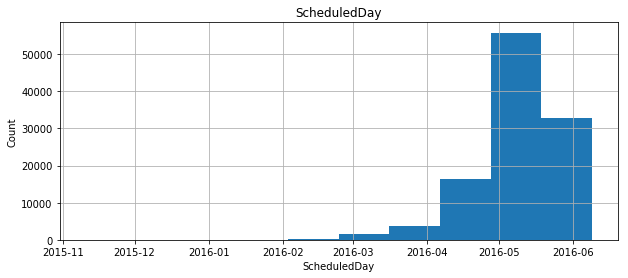

In [54]:
df.ScheduledDay.hist(figsize=(10,4));
plt.xlabel('ScheduledDay');
plt.ylabel('Count');
plt.title('ScheduledDay');

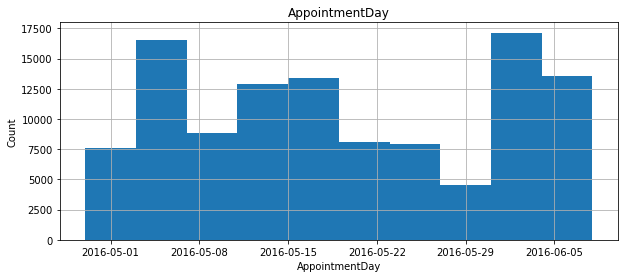

In [55]:
df.AppointmentDay.hist(figsize=(10,4));
plt.xlabel('AppointmentDay');
plt.ylabel('Count');
plt.title('AppointmentDay');

## Research Questions

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

#### Does the patient's Age affect the chances of people showing up for their appointments?

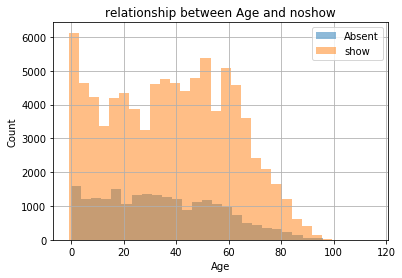

In [56]:
df[Absent].Age.hist(alpha=0.5,bins=30,label="Absent")
df[show].Age.hist(alpha=0.5,bins=30,label="show")
plt.legend();
plt.title("relationship between Age and noshow")
plt.xlabel("Age")
plt.ylabel("Count");

from the histogram, there is no strong correlation between age and missing appointments and children and adults from 40 to 60 are more likely to show up.

#### which day of the week is more turnup of patients recorded?

In [57]:
df['dayofweek']= df['ScheduledDay'].dt.dayofweek
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,noshow,dayofweek
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4


In [58]:
df.groupby('dayofweek')['noshow'].value_counts()


dayofweek  noshow
0          No        18524
           Yes        4561
1          No        20877
           Yes        5291
2          No        19383
           Yes        4879
3          No        14373
           Yes        3700
4          No        15028
           Yes        3887
5          No           23
           Yes           1
Name: noshow, dtype: int64

According to pandas datetime attributes, monday= 0 and sunday = 6. that means that the most popular day of the week is Tuesday with 20877 patients showing up and 5391 people absent. while the day of the week with the least number of people attending turned out to be Saturday with 23 people showing up and 1 person absent

Visualization

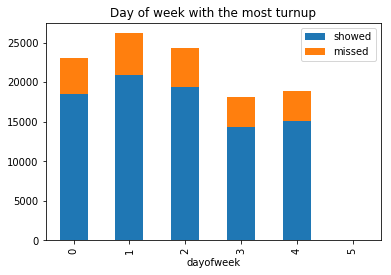

In [59]:
df.groupby('dayofweek')['noshow'].value_counts().unstack().plot(kind="bar",stacked=True);
plt.legend(['showed','missed']);
plt.title('Day of week with the most turnup');

<a id='conclusions'></a>
## Conclusions 
There could be other reasons why patients didnt show up for their appointments. example. in the gender and noshow histogram chart, the reason why the females showed up more could be that there are more females than males in the dataframe.


## Limitations

* The Handcap and SMS_received columns weren't explained clearly on the dataset page
* The dichotomous nature of some columns 
* There were some columns with incorrect datatypes

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0